In [37]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [38]:
# Bước 1: Đọc file dữ liệu
file_path = 'country_wise_latest.csv'
data = pd.read_csv(file_path)

In [39]:
# Bước 2: Lựa chọn dữ liệu
# Sử dụng cột 'Confirmed' và 'Deaths' để phân cụm
selected_columns = data[['Confirmed', 'Deaths']].dropna()  # Loại bỏ các hàng có giá trị NaN

In [40]:
# Bước 3: Chuẩn hóa dữ liệu
# Dữ liệu được chuẩn hóa để mỗi cột có giá trị trung bình = 0 và độ lệch chuẩn = 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)

In [41]:
for n in range(1, 10):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(scaled_data)
    print(f"Components: {n}, BIC: {gmm.bic(scaled_data)}, AIC: {gmm.aic(scaled_data)}")


Components: 1, BIC: 700.6582473225282, AIC: 684.5027042382552
Components: 2, BIC: 375.99770591904974, AIC: 340.4555111336493
Components: 3, BIC: 375.83229334720886, AIC: 320.9034468606809
Components: 4, BIC: -1127.6745436618216, AIC: -1201.9900418494772
Components: 5, BIC: -1219.5578263572725, AIC: -1313.2599762460554
Components: 6, BIC: -1232.5479803677667, AIC: -1345.6367819576774
Components: 7, BIC: -1269.601323328985, AIC: -1402.076776620023
Components: 8, BIC: -1492.038250910047, AIC: -1643.9003559022126
Components: 9, BIC: -1506.2375513482161, AIC: -1677.4863080415091


In [42]:
# Bước 5: Thêm nhãn cụm vào DataFrame
# Lưu nhãn cụm vào DataFrame để kiểm tra hoặc phân tích thêm
selected_columns['Cluster'] = clusters

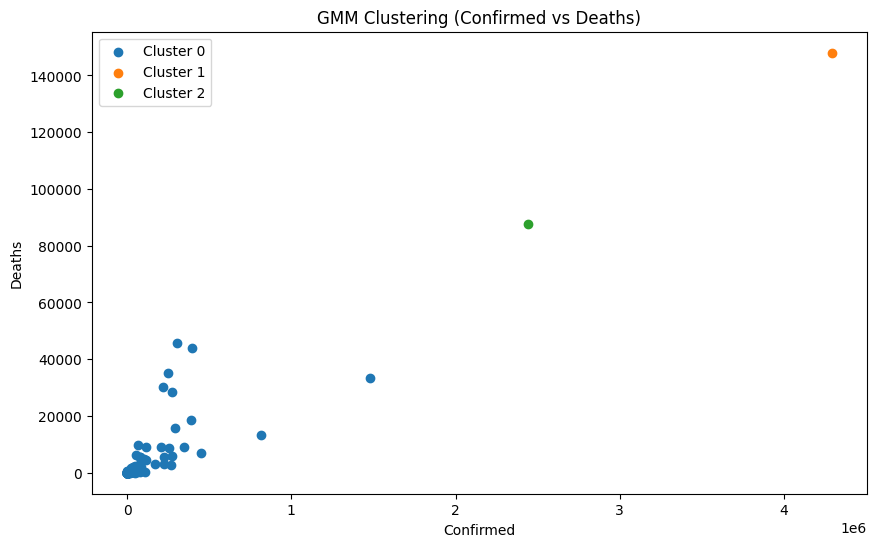

In [45]:
# Bước 6: Hiển thị kết quả phân cụm
# Sử dụng matplotlib để vẽ biểu đồ scatter các điểm dữ liệu theo cụm
# Bước 6: Hiển thị kết quả phân cụm với dữ liệu gốc
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ scatter dựa trên các cụm
for cluster in np.unique(clusters):
    # Lấy các điểm dữ liệu thuộc cụm hiện tại
    cluster_data = selected_columns[selected_columns['Cluster'] == cluster]
    plt.scatter(cluster_data['Confirmed'], cluster_data['Deaths'], label=f'Cluster {cluster}')

# Gắn nhãn trục và tiêu đề biểu đồ
plt.title('GMM Clustering (Confirmed vs Deaths)')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.legend()
plt.show()



In [47]:

# Bước 7: Hiển thị dữ liệu với cụm đã phân
# Thêm nhãn cụm vào DataFrame gốc để phân tích dễ dàng hơn
data_with_clusters = data[['Confirmed', 'Deaths']].copy()
data_with_clusters = data_with_clusters.dropna()  # Loại bỏ các hàng NaN
data_with_clusters['Cluster'] = clusters

# In dữ liệu mẫu
print("Dữ liệu với các cụm đã phân:")
print(data_with_clusters.head(10))  # Hiển thị 10 dòng đầu tiên

# (Tùy chọn) Lưu dữ liệu với cụm vào file CSV để sử dụng sau này
output_file_path = 'country_clusters.csv'
data_with_clusters.to_csv(output_file_path, index=False)
print(f"Dữ liệu đã được lưu vào file: {output_file_path}")


Dữ liệu với các cụm đã phân:
   Confirmed  Deaths  Cluster
0      36263    1269        0
1       4880     144        0
2      27973    1163        0
3        907      52        0
4        950      41        0
5         86       3        0
6     167416    3059        0
7      37390     711        0
8      15303     167        0
9      20558     713        0
Dữ liệu đã được lưu vào file: country_clusters.csv
